In [1]:
#Paquete necesario para el código: 
# pip install notebook scikit-learn numpy

#PARTE INICIAL PARA OBTENER INFORMACIÓN DEL CONJUNTO DE DATOS.

import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Cargar el dataset
california = fetch_california_housing()
X = california.data
y = california.target.reshape(-1, 1)
feature_names = california.feature_names
#print (feature_names)
print(X.shape)
print(y.shape)
print('Descripción del dataset:')
print(california.DESCR[:1500])


(20640, 8)
(20640, 1)
Descripción del dataset:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived 

In [2]:
#Preprocesamiento : normalización de datos y escogencia de entrenamiento (80%) y prueba (20%)

#1. Escogemos conjunto de training y conjunto de test.
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)

#2. Normalizamos los datos de training y los de test (teniendo en cuenta solo la información estadística del training).
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.326196  ,  0.34849025, -0.17491646, ...,  0.05137609,
        -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, ..., -0.11736222,
        -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, ..., -0.03227969,
        -0.46014647, -0.44760309],
       ...,
       [-0.49697313,  0.58654547, -0.60675918, ...,  0.02030568,
        -0.75500738,  0.59946887],
       [ 0.96545045, -1.07984112,  0.40217517, ...,  0.00707608,
         0.90651045, -1.18553953],
       [-0.68544764,  1.85617335, -0.85144571, ..., -0.08535429,
         0.99543676, -1.41489815]])

In [3]:

#Definimos los parámetros.

def inicializar_parametros(n_caracteristicas):
    '''
    Inicializa los pesos y el sesgo del perceptrón.
    Parámetros:
    -----------
    n_caracteristicas : int
        Número de características de entrada
    
    Retorna:
    --------
    w : numpy array de forma (n_caracteristicas, 1)
    b : float (escalar)
    '''   
    # Pesos aleatorios pequeños

    w = np.random.randn(n_caracteristicas, 1) * 0.01
        
    # Sesgo en cero
    b = 0.0
    
    return w, b


#asignar caracteristicas
n_caracteristicas = X_train_scaled.shape[1]

#asignar pesos y sesgos.
w, b = inicializar_parametros(n_caracteristicas)

In [4]:
#Definimos la suma ponderada de las caracteristicas con sus pesos para los ejemplos
def propagacion_adelante(X, w, b):
    z = X @ w + b 
    return z

In [5]:
#Ejemplo de predicción para 5 registros

X_train_exa = X_train_scaled[:5]
y_real_exa = y_train[:5]

# Predicciones iniciales
y_pred_exa = propagacion_adelante(X_train_exa, w, b)

print("Predicciones iniciales:")
print(y_pred_exa)

print("\nValores reales:")
print(y_real_exa)


Predicciones iniciales:
[[ 0.00693373]
 [ 0.01150718]
 [ 0.02166693]
 [ 0.01283604]
 [-0.00561289]]

Valores reales:
[[1.03 ]
 [3.821]
 [1.726]
 [0.934]
 [0.965]]


In [6]:

"Función que calcula la pérdida para este caso de regresión"
def calcular_perdida(y_pred, y_real):
    '''
    Calcula el error cuadrático medio.
    MSE = (1/m) * sum((y_pred - y_real)^2)
    '''
    m = y_real.shape[0]
    
    mse = (1/m) * np.sum((y_pred - y_real)**2)
    
    return mse


In [7]:
#Definimos la predicción de las viviendas para los parámetros iniciales.
y_pred_t=propagacion_adelante(X_train_scaled,w,b)

#Calculamos la pérdida para esta primera predicción
mse_i=calcular_perdida(y_pred_t,y_train)
print(mse_i)

5.6063895327491275


In [8]:
#Definimos los gradientes con respecto a los parámetros

def calcular_gradientes (X, y_pred,y_real):
    m=X.shape[0]

    error=y_pred-y_real
    
    dw=(2/m)*(X.T @ error)
    db=(2/m)*np.sum(error)

    return dw,db


In [9]:
#Definimos la actualización de parámetros.
def actualizar_parametros (w,b,dw,db,learning_rate):
    
    w= w - learning_rate*dw 
    b= b - learning_rate*db    

    return w,b



In [10]:
def entrenar_perceptron(X_train, y_train, learning_rate, epochs):
    '''
    Entrena un perceptrón para regresión.
    '''
    n_caracteristicas = X_train_scaled.shape[1]

#asignar pesos y sesgos.
    w, b = inicializar_parametros(n_caracteristicas)
    historial_perdida = []
    
    for epoca in range(epochs):
        
        # 1️ Propagación adelante
        y_pred = propagacion_adelante(X_train, w, b)
        
        # 2️ Calcular pérdida
        perdida = calcular_perdida(y_pred, y_train)
        historial_perdida.append(perdida)
        
        # 3️ Calcular gradientes
        dw, db = calcular_gradientes(X_train, y_pred, y_train)
        
        # 4️ Actualizar parámetros
        w, b = actualizar_parametros(w, b, dw, db, learning_rate)
        
        if epoca % 100 == 0:
            print(f'Época {epoca}, Pérdida: {perdida:.4f}')
            #print("Pesos:", w.flatten())
            #print("Sesgo:", b)
            print("-"*50)
            #print(f'Época {epoca}, Pérdida: {perdida:.4f}')
    
    return w, b, historial_perdida





In [11]:
w4,b4,historial_perdida4=entrenar_perceptron(X_train_scaled,y_train,1.0,1000)
w1,b1,historial_perdida1=entrenar_perceptron(X_train_scaled, y_train,0.01,1000)
w2,b2,historial_perdida2=entrenar_perceptron(X_train_scaled,y_train,0.1,1000)
w3,b3,historial_perdida3=entrenar_perceptron(X_train_scaled,y_train,0.001,1000)


Época 0, Pérdida: 5.6436
--------------------------------------------------
Época 100, Pérdida: 8001419450041335250141117301088888072591246825611379853364061106627687607916436623224580603904.0000
--------------------------------------------------
Época 200, Pérdida: 58772931289815421275677268327335960917210330056215475445334975862520109744144507028706258128277580517177809933999256214777342659035101999090602411072949411896296813818487759655814898678497280.0000
--------------------------------------------------
Época 300, Pérdida: 431705595188474859161557225374993781699161053296765459522010677292656904735810881103733404318506014483522906211595498761162326442584311986321577718408295936354649587110128076016090212721268916190539889862112207786552520927662375384190503923859956818934906652430808676376438654499379216384.0000
--------------------------------------------------
Época 400, Pérdida: inf
--------------------------------------------------
Época 500, Pérdida: inf
---------------------

c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\andre\AppData\Local\Temp\ipykernel_14196\2217420206.py:9: RuntimeWarning: overflow encountered in square
  mse = (1/m) * np.sum((y_pred - y_real)**2)
C:\Users\andre\AppData\Local\Temp\ipykernel_14196\871541737.py:8: RuntimeWarning: overflow encountered in matmul
  dw=(2/m)*(X.T @ error)
C:\Users\andre\AppData\Local\Temp\ipykernel_14196\871541737.py:8: RuntimeWarning: invalid value encountered in matmul
  dw=(2/m)*(X.T @ error)
c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\andre\AppData\Local\Temp\ipykernel_14196\4268068236.py:4: RuntimeWarning: invalid value encountered in subtract
  w= w - learn

Época 900, Pérdida: nan
--------------------------------------------------
Época 0, Pérdida: 5.6323
--------------------------------------------------
Época 100, Pérdida: 0.7092
--------------------------------------------------
Época 200, Pérdida: 0.5946
--------------------------------------------------
Época 300, Pérdida: 0.5727
--------------------------------------------------
Época 400, Pérdida: 0.5580
--------------------------------------------------
Época 500, Pérdida: 0.5473
--------------------------------------------------
Época 600, Pérdida: 0.5396
--------------------------------------------------
Época 700, Pérdida: 0.5339
--------------------------------------------------
Época 800, Pérdida: 0.5298
--------------------------------------------------
Época 900, Pérdida: 0.5267
--------------------------------------------------
Época 0, Pérdida: 5.6434
--------------------------------------------------
Época 100, Pérdida: 0.5245
--------------------------------------------

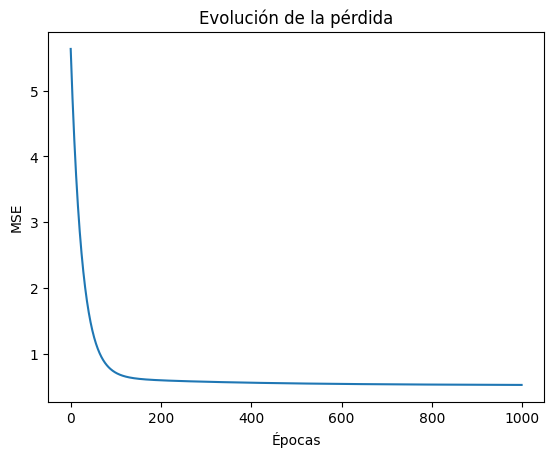

In [12]:

import matplotlib.pyplot as plt
plt.plot(historial_perdida1)
plt.xlabel("Épocas")
plt.ylabel("MSE")
plt.title("Evolución de la pérdida")
plt.show()


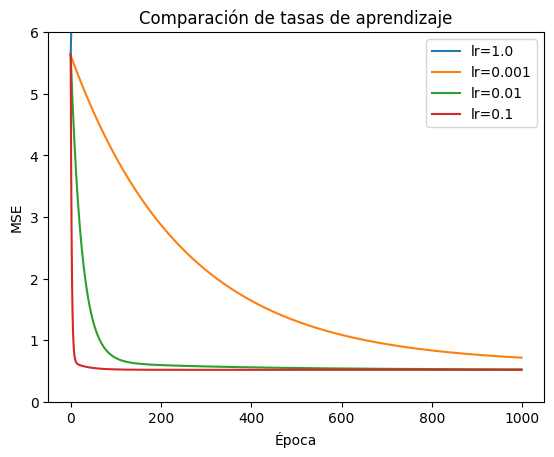

In [13]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(historial_perdida4, label="lr=1.0")
plt.plot(historial_perdida3, label="lr=0.001")
plt.plot(historial_perdida1, label="lr=0.01")
plt.plot(historial_perdida2, label="lr=0.1")

plt.xlabel("Época")
plt.ylabel("MSE")
plt.ylim(0,6)
plt.title("Comparación de tasas de aprendizaje")
plt.legend()

plt.show()



In [14]:
w1,b1,historial_perdida1=entrenar_perceptron(X_train_scaled, y_train,0.01,1000)

Época 0, Pérdida: 5.6585
--------------------------------------------------
Época 100, Pérdida: 0.7097
--------------------------------------------------
Época 200, Pérdida: 0.5943
--------------------------------------------------
Época 300, Pérdida: 0.5724
--------------------------------------------------
Época 400, Pérdida: 0.5578
--------------------------------------------------
Época 500, Pérdida: 0.5472
--------------------------------------------------
Época 600, Pérdida: 0.5395
--------------------------------------------------
Época 700, Pérdida: 0.5338
--------------------------------------------------
Época 800, Pérdida: 0.5297
--------------------------------------------------
Época 900, Pérdida: 0.5267
--------------------------------------------------


In [15]:
mse_entrenamiento_final = historial_perdida1[-1]
print("MSE final de entrenamiento:", mse_entrenamiento_final)


MSE final de entrenamiento: 0.5244709547864107


In [16]:
y_test_pred = propagacion_adelante(X_test_scaled, w1, b1)


In [17]:
mse_test = calcular_perdida(y_test_pred, y_test)
print("MSE en conjunto de prueba:", mse_test)


MSE en conjunto de prueba: 0.5543552708348214


In [18]:
mse_final_training=historial_perdida1[-1]
print("\n MSE final en entrenamiento:",mse_final_training )


 MSE final en entrenamiento: 0.5244709547864107


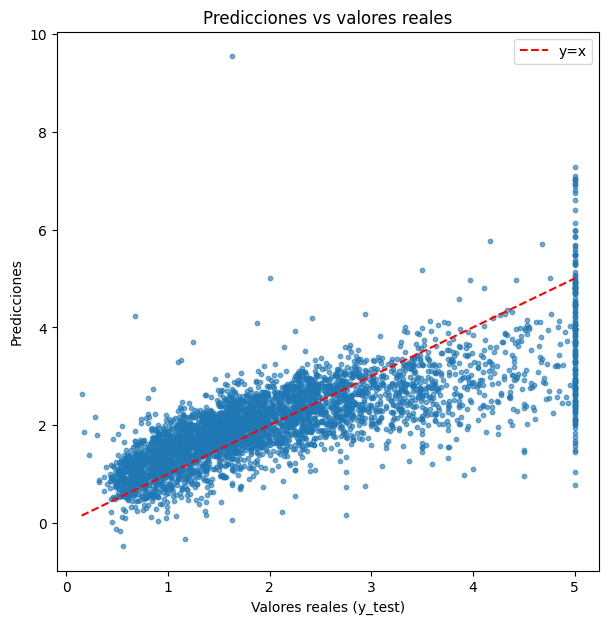

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_test_pred, s=10,alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', label='y=x')
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones")
plt.title("Predicciones vs valores reales")
plt.legend()
plt.show()


In [20]:
SS_res = np.sum((y_test - y_test_pred)**2)
SS_tot = np.sum((y_test - np.mean(y_test))**2)

R2 = 1 - (SS_res / SS_tot)

print("R²:", R2)

R²: 0.5769601093705944
